<a href="https://colab.research.google.com/github/likhon15-4915/Research-Innovation/blob/main/SkinDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [93]:
IMAGE_SIZE = 256
BATCH_SIZE = 79
CHANNELS = 3

In [94]:
from google.colab import drive
drive.mount('/content/mount')

Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).


In [95]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/mount/MyDrive/Research and Innovation/skin-disease-datasaet/train_set",
    seed=123,
    shuffle=True,
  image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 924 files belonging to 8 classes.


In [96]:
class_names =dataset.class_names
class_names

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [97]:
len(dataset)

12

In [98]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(79, 256, 256, 3)
[1 3 2 4 3 6 0 4 7 2 5 0 7 7 6 7 7 2 7 4 4 1 6 3 6 0 2 5 7 5 3 2 1 4 4 0 3
 7 2 3 4 6 7 3 6 2 5 6 2 6 3 2 7 6 5 2 5 2 4 5 5 7 5 7 4 3 0 6 3 2 3 2 6 0
 5 1 5 0 3]


In [99]:
len(dataset)

12

In [72]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(79, 256, 256, 3)
[3 1 3 0 5 4 4 0 2 4 2 7 3 2 1 7 7 5 3 6 7 7 1 4 6 0 0 0 0 0 5 2 6 7 4 3 0
 4 5 0 0 7 5 4 5 3 7 3 1 6 2 1 6 2 6 0 2 2 1 6 2 1 5 3 2 1 3 4 6 4 0 6 2 1
 4 5 7 7 7]


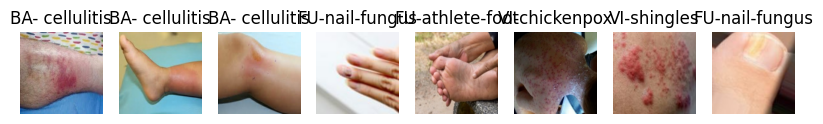

In [127]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(1, 8, i+1)#(6,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [128]:
def get_dataset(ds ,train_split=0.8,val_split=0.1 , test_split=0.1,shuffle=True, shuffle_size =1000):
  assert(train_split+val_split+test_split)==1
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)

  train_size = int(train_split*ds_size)
  val_size = int (val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [129]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [130]:
len(train_ds)

9

In [131]:
len(val_ds)

1

In [132]:
len(test_ds)

2

In [133]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [134]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [135]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [136]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [137]:
train_ds = train_ds.map(
    lambda x,y: (data_augmentation(x,training=True),y)
).prefetch(buffer_size = tf.data.AUTOTUNE)

In [138]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =8

model = models.Sequential([
resize_and_rescale,
layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64,(3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense (64, activation='relu'),
layers.Dense (n_classes, activation='softmax'),

])

model.build(input_shape = input_shape)

In [139]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (79, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (79, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (79, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (79, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (79, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (79, 60, 60, 64)        

In [140]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [141]:
history = model.fit(
    train_ds,
    batch_size =BATCH_SIZE,
    validation_data = val_ds,
    epochs=20
)

Epoch 1/20
9/9 [==============================] - 128s 13s/step - loss: 2.0730 - accuracy: 0.1266 - val_loss: 2.0691 - val_accuracy: 0.0886
Epoch 2/20
9/9 [==============================] - 120s 13s/step - loss: 2.0589 - accuracy: 0.1383 - val_loss: 2.0580 - val_accuracy: 0.1646
Epoch 3/20
9/9 [==============================] - 116s 12s/step - loss: 2.0521 - accuracy: 0.1528 - val_loss: 2.0502 - val_accuracy: 0.1772
Epoch 4/20
9/9 [==============================] - 116s 13s/step - loss: 2.0153 - accuracy: 0.1645 - val_loss: 2.0067 - val_accuracy: 0.2532
Epoch 5/20
9/9 [==============================] - 116s 12s/step - loss: 1.9574 - accuracy: 0.2096 - val_loss: 1.9605 - val_accuracy: 0.3671
Epoch 6/20
9/9 [==============================] - 118s 13s/step - loss: 1.9112 - accuracy: 0.2838 - val_loss: 1.9736 - val_accuracy: 0.3418
Epoch 7/20
9/9 [==============================] - 115s 13s/step - loss: 1.8737 - accuracy: 0.3217 - val_loss: 1.9230 - val_accuracy: 0.3924
Epoch 8/20
9/9 [====

In [142]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 13s 3s/step - loss: 1.2408 - accuracy: 0.5127


In [143]:
scores

[1.2408190965652466, 0.5126582384109497]

In [144]:
history

In [145]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 9}

In [146]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [147]:
len(history.history['loss'])

20

In [148]:
history.history['loss'][:5]

[2.072974681854248,
 2.058871030807495,
 2.0520894527435303,
 2.0153024196624756,
 1.9574253559112549]

In [149]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

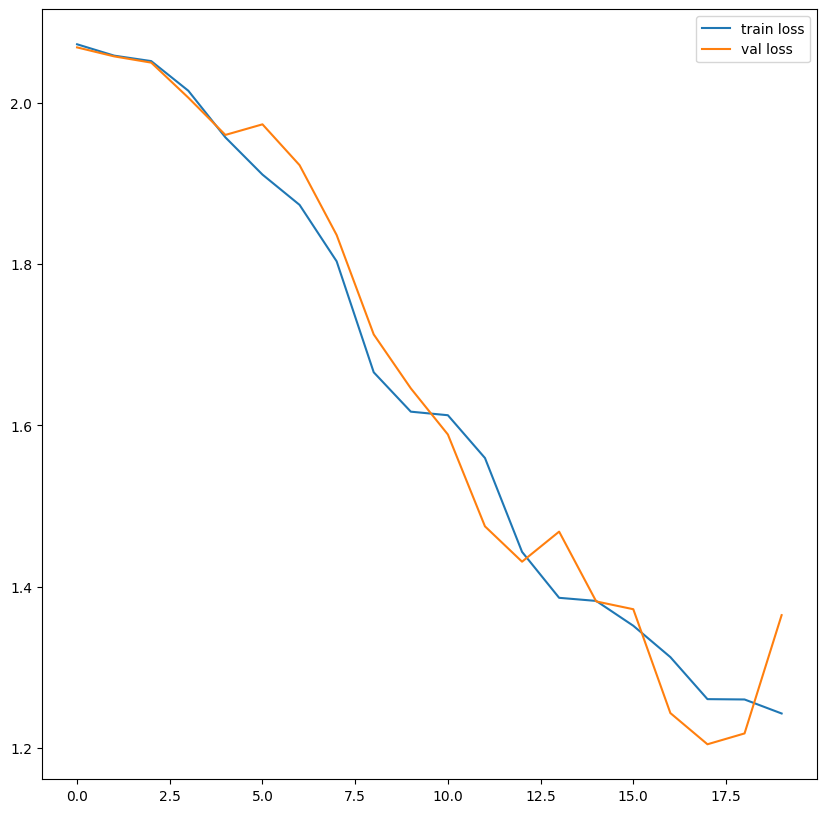

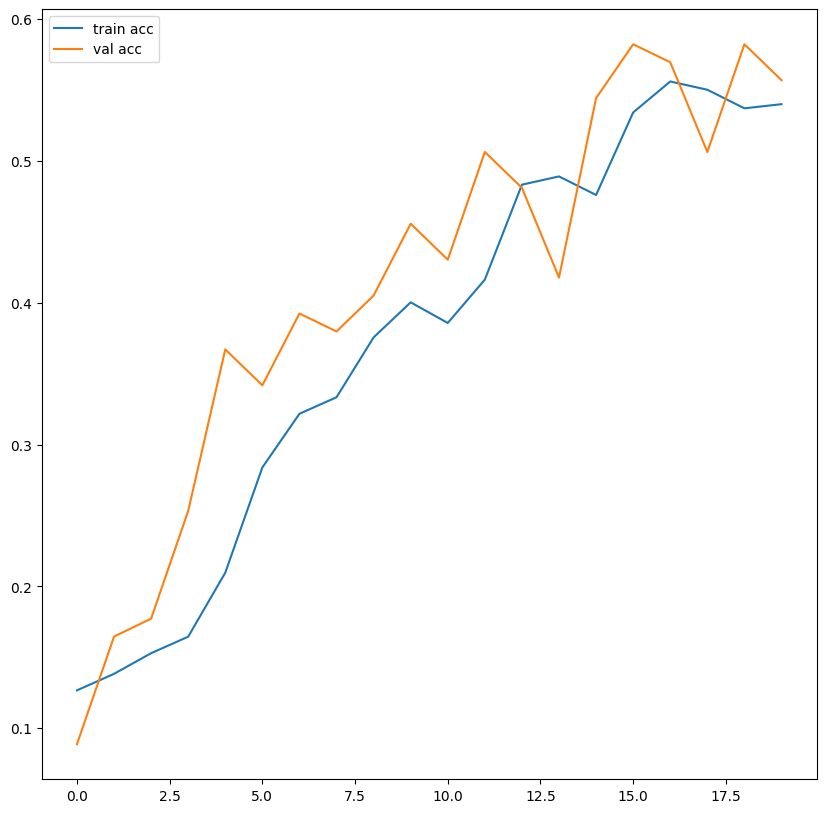

In [150]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

First image to predict
actual label:  BA- cellulitis
3/3 [==============================] - 6s 2s/step
predicted label:  FU-athlete-foot


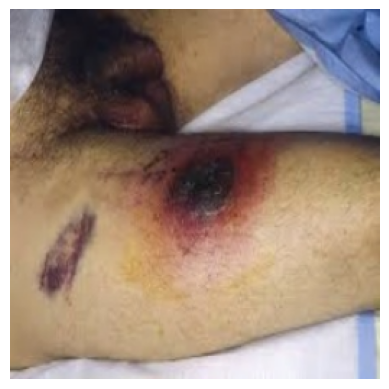

In [151]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("actual label: ",class_names [first_label])


    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [152]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims (img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names [np.argmax (predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 145ms/step


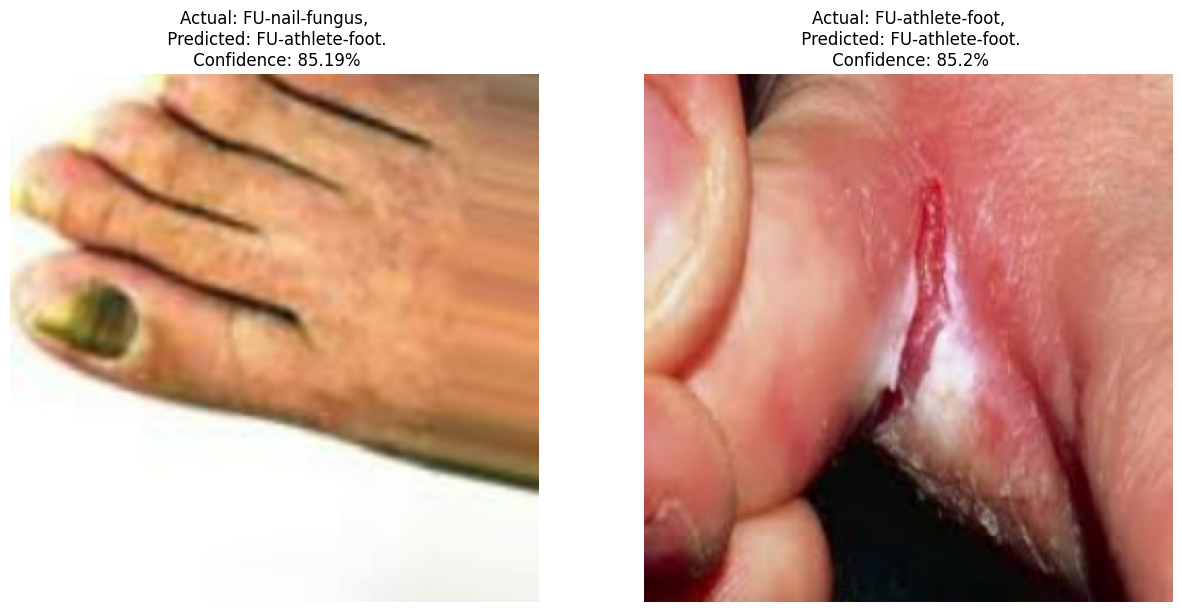

In [153]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):

  for i in range(2):

    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict (model, images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")